The model is MobileNet pretrained on ImageNet. The head of the model is replaced to classify three classes.

The dataset consists of 200 train and 70 val images, which is downloaded when the Notebook is run. No need to import from Google Drive.

The accuracy on both train and val is above 90%.

In [0]:
!pip install google_images_download

!pip install git+https://github.com/raghakot/keras-vis.git -U
  
!pip uninstall scipy
!pip install scipy==1.2.1

In [0]:
!apt update
!apt install chromium-chromedriver

In [0]:
!pip install git+https://github.com/raghakot/keras-vis.git -U
  
!pip uninstall scipy
!pip install scipy==1.2.1

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r 'drive/My Drive/New2/Data/' 'data/'

In [0]:
!rm -r data

In [0]:
!mkdir data

In [0]:
!cp -r 'train/data_256/' 'data/' 

In [0]:
!mkdir train

In [0]:
!tar -xf "drive/My Drive/train.tar" -C train

tar: drive/My Drive/train.tar: Cannot read: Operation canceled
tar: Exiting with failure status due to previous errors


In [0]:
!tar -xzf "drive/My Drive/SOICT2.tar.gz" -C data

In [0]:
!cp "drive/My Drive/SOICT2.tar.gz" SOICT2.tar.gz

In [0]:
!tar czf SOICT.tar.gz data/Data

In [0]:
!tar czf SOICT2.tar.gz data/data/Data

In [0]:
!cp SOICT2.tar.gz "drive/My Drive/SOICT2.tar.gz"

In [0]:
!mv data/Data/tai\ nạn\ giao\ thông data/Data/t

In [0]:
!mkdir data/data/Data/negative

In [0]:
!git clone https://github.com/CSAILVision/places365

In [0]:
!wget http://places2.csail.mit.edu/models_places365/alexnet_places365.caffemodel

In [0]:
!wget http://places2.csail.mit.edu/models_places365/vgg16_places365.caffemodel

In [0]:
!wget http://places2.csail.mit.edu/models_places365/googlenet_places365.caffemodel

In [0]:
!cat places365/deploy_vgg16_places365.prototxt

In [0]:
%pycat places365/deploy_googlenet_places365.prototxt

In [0]:
%%writefile places365/deploy_googlenet_places365.prototxt

Overwriting places365/deploy_googlenet_places365.prototxt


In [0]:
!apt install caffe-cuda

In [0]:
!git clone https://github.com/GKalliatakis/Keras-VGG16-places365

In [0]:
keywords_positive = ["kẹt xe", "lũ lụt", "hỏa hoạn"]

In [0]:
keywords_positive = ["c", "h", "k", "l", "t", "negative"]

In [0]:
keywords_positive = ["c", "h", "k", "l", "t"]

In [0]:
keywords_negative = [["a/apartment_building/outdoor", 800],
                     ["c/cottage", 800],
                     ["f/field_road", 800],
                     ["h/highway", 800],
                     ["h/house", 800]]

In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

keywords = ["kẹt xe", "lũ lụt", "hỏa hoạn"]

for keyword in keywords:
  arguments = {"keywords": keyword, "output_directory": "data", "format": "jpg",
              "chromedriver": "chromedriver", "limit": 500}
  response.download(arguments)

In [0]:
img_size = 160

In [0]:
import os
import cv2 as cv
import numpy as np
import keras

x = []
y = []

class_list = []

num_in_class = []

#num_class = len(keywords_positive) + 1
num_class = len(keywords_positive)

for (i, keyword) in enumerate(keywords_positive):
  class_list.append(keyword)
  
  path = r'data/data/data/Data/' + keyword
  name_list = os.listdir(path)
  
  num_in_class.append(len(name_list))
  
  for (j, name) in enumerate(name_list):
    if j % 1 == 0:
      print(i, j, name)
    
    img = cv.imread(path + '/' + name)
    
    if img is None:
      continue
    
    img_resize = cv.resize(img, (img_size, img_size))
    # img_channel = np.transpose(img_resize, (2, 0, 1))
    
    x.append(img_resize)
    y.append(i)

Using TensorFlow backend.


0 0 52.Chuye%CC%82n-cung-ca%CC%82%CC%81p-ma%CC%81y-cu%CC%9Ba-xi%CC%81ch-Husqvarna-chi%CC%81nh-ha%CC%83ng-ma%CC%81y-Nga%CC%80nh-No%CC%82ng-Nghie%CC%A3%CC%82p-La%CC%82m-Nghie%CC%A3%CC%82p-600x600.jpg
0 1 157.bao-so-3-do-bo-mong-cai-mua-ngap-cay-do-ngon-ngang-5.jpg
0 2 316.152d2091652t10835l0.jpg
0 3 551.zsa1565319580.jpg
0 4 363.cay-do51.jpg
0 5 256.autopro-cay-do-vao-nguoi-di-xe-may-ha-noi-1469688097868-crop1469688101379p.jpg
0 6 502.1469666236-146966606142263-do-cay-4.jpg
0 7 194.bao-so-3-do-bo-mong-cai-mua-ngap-cay-do-ngon-ngang-2.jpg
0 8 42.cay-do-2-0900083.jpg
0 9 591.1469667010-146966699762352-cay-do-16.jpg
0 10 356.cay-co-thu-bat-goc-de-3-can-nha-sau-mua-lon_1.jpg
0 11 373.bat_goc2_XNQZ.jpg
0 12 83.ttxvn_dong_nai_thong_tuyen_duong_sat_bac__nam_sau_nhieu_gio_te_liet_do_cay_xanh_do_chan_ngang_duong_ray_3972845.jpg
0 13 57.1505979483-cay-co-thu-bat-goc-1.jpg
0 14 540.tphcm-mua-lon-cay-xanh-bat-goc-de-bep-o-to-giua-pho.JPG
0 15 34.001a1974-15670785634661887296344.jpg
0 16 535.69174835

In [0]:
num_in_class

[1406, 1192, 1017, 1344, 1004, 4000]

In [0]:
x = np.array(x, dtype = 'float64')
x -= 128
x /= 128

y = np.array(y)
y = keras.utils.to_categorical(y, num_class)

In [0]:
x.shape

(9961, 160, 160, 3)

In [0]:
import caffe

# caffe.set_mode_gpu()

net = caffe.Net('places365/deploy_googlenet_places365.prototxt',
                'googlenet_places365.caffemodel', caffe.TEST)

In [0]:
feature = []

In [0]:
ex_batch = 64

In [0]:
for i in range(x.shape[0] // ex_batch + 1):
  print(i)
  
  num = ex_batch if ex_batch * (i + 1) <= x.shape[0] else x.shape[0] - ex_batch * i
  
  net.blobs['data'].data[:num] = x[ex_batch * i : ex_batch * i + num]
  
  #for j in range(num):
  #  net.blobs['data'].data[j] = x[10 * i + j]
  
  net.forward()
  
  feature.extend(net.blobs['inception_5b/output'].data[:num])
  
  #for j in range(num):
  #  feature.append(net.blobs['fc7'].data[j])

In [0]:
feature = np.array(feature)

In [0]:
feature.shape

(5961, 1024, 7, 7)

In [0]:
outFile = open('features.txt', 'wb')

feature.tofile(outFile)

outFile.close()

In [0]:
Xread = np.fromfile('features.txt', dtype = 'float32')

In [0]:
Xread.shape

(24416256,)

In [0]:
features = Xread.reshape(5961, 4096)

In [0]:
features.shape

(5961, 4096)

In [0]:
x = feature

In [0]:
x.shape

(9961, 224, 224, 3)

In [0]:
#class_list.append("no disaster")

neg_i = 0

for (i, keyword) in enumerate(keywords_negative):
  path = r'train/data_256/' + keyword[0]
  name_list = np.array(os.listdir(path))
  
  choice = np.random.permutation(np.arange(len(name_list)))
  name_list_choice = name_list[choice[:keyword[1]]]
  
  for (j, name) in enumerate(name_list_choice):
    if j % 1 == 0:
      print(i, j, name)
    
    img = cv.imread(path + '/' + name)
    img_resize = cv.resize(img, (224, 224))
    
    cv.imwrite(r'data/data/Data/negative/' + str(neg_i) + ".jpg", img_resize)
    
    neg_i += 1
    
    #x.append(img_resize)
    #y.append(num_class - 1)

#x = np.array(x, dtype = 'float64')
#x = (x - 128) / 128

#y = np.array(y)
#y = keras.utils.to_categorical(y, num_class)

In [0]:
x.shape

(9961, 224, 224, 3)

In [0]:
size_normal = 2000
x = x[:5963 + size_normal]

In [0]:
size = x.shape[0]
train_size = 4800
val_size = 600
test_size = size - train_size - val_size

In [0]:
size = x.shape[0]
train_size = 8500
val_size = size - train_size
test_size = size - train_size - val_size

In [0]:
choice = np.random.permutation(np.arange(size))
choice_train = choice[:train_size]
choice_val = choice[train_size:train_size + val_size]
choice_test = choice[train_size + val_size:]

x_train = x[choice_train]
y_train = y[choice_train]

x_val = x[choice_val]
y_val = y[choice_val]

x_test = x[choice_test]
y_test = y[choice_test]

In [0]:
x_train.shape

(8500, 160, 160, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

model.add(Flatten(input_shape = (1024, 7, 7)))

model.add(Dense(num_class, activation = 'softmax', name = 'preds'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.1, height_shift_range = 0.2,
                         shear_range = 0.1, zoom_range = 0.1, fill_mode = 'nearest',
                         horizontal_flip = True)

In [0]:
import sys
sys.path.insert(1, '/content/Keras-VGG16-places365')

In [0]:
!cp vgg16_places_365.py Keras-VGG16-places365/vgg16_places_365.py

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.applications.xception import Xception
# from vgg16_places_365 import VGG16_Places365

from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Activation
from keras.models import Model

base_model = MobileNet(weights = 'imagenet', include_top = False, input_shape = (img_size, img_size, 3))
# base_model = VGG16(include_top = False, input_shape = (img_size, img_size, 3))

l = base_model.output

l = GlobalAveragePooling2D()(l)
l = Dropout(0.5)(l)

l = Dense(num_class, activation = 'softmax', name = 'preds')(l)

model = Model(inputs = base_model.input, outputs = l)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])












17227776/17225924 [==============================] - 0s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128 

In [0]:
epoch_count = 10
bs_train = 64

In [0]:
h = model.fit(x_train, y_train, batch_size = bs_train, epochs = epoch_count,
              validation_data = (x_val, y_val))

In [0]:
h = model.fit_generator(aug.flow(x_train, y_train, batch_size = bs_train),
                        steps_per_epoch = train_size // bs_train, epochs = epoch_count,
                        validation_data = (x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
132/132 [==============================] - 51s 390ms/step - loss: 1.2169 - acc: 0.6038 - val_loss: 0.4045 - val_acc: 0.8638
Epoch 2/10
132/132 [==============================] - 49s 374ms/step - loss: 0.6527 - acc: 0.7754 - val_loss: 0.3383 - val_acc: 0.8871
Epoch 3/10
132/132 [==============================] - 48s 365ms/step - loss: 0.5451 - acc: 0.8139 - val_loss: 0.2970 - val_acc: 0.9035
Epoch 4/10
132/132 [==============================] - 47s 359ms/step - loss: 0.4927 - acc: 0.8349 - val_loss: 0.2822 - val_acc: 0.9035
Epoch 5/10
132/132 [==============================] - 47s 359ms/step - loss: 0.4667 - acc: 0.8421 - val_loss: 0.2885 - val_acc: 0.9042
Epoch 6/10
132/132 [==============================] - 47s 359ms/step - loss: 0.4340 - acc: 0.8481 - val_loss: 0.2662 - val_acc: 0.9131
Epoch 7/10
132/132 [==============================] - 46s 352ms/step - loss: 0.4410 - acc: 0.8

In [0]:
model.predict(x, batch_size = 1, verbose = 1)

9961/9961 [==============================] - 66s 7ms/step


array([[9.8363274e-01, 9.1558782e-04, 1.2738364e-03, 1.2957412e-02,
        1.1691480e-03, 5.1307652e-05],
       [8.4935594e-01, 7.5847441e-03, 9.8987775e-06, 1.4045212e-01,
        1.1459630e-04, 2.4827116e-03],
       [1.8781397e-01, 4.9255537e-03, 5.0034132e-03, 8.3455421e-02,
        6.9723099e-01, 2.1570645e-02],
       ...,
       [2.6841149e-06, 1.8518442e-06, 1.5807759e-08, 3.0620969e-03,
        1.4840892e-05, 9.9691856e-01],
       [1.5517342e-04, 5.7689066e-04, 1.4230117e-04, 1.4581371e-03,
        4.1966964e-04, 9.9724787e-01],
       [9.1297203e-04, 4.7339912e-04, 1.5581791e-04, 4.7870199e-04,
        5.7532943e-05, 9.9792153e-01]], dtype=float32)

In [0]:
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
truth = np.argmax(y_val, axis = 1)
predict = np.argmax(model.predict(x_val), axis = 1)

acc = np.mean(predict == truth) * 100
print(acc)

92.12867898699521


In [0]:
tp = 0
fp = 0
tn = 0
fn = 0

for i in range(truth.shape[0]):
  if predict[i] == 0:
    if truth[i] == 0:
      tp += 1
    else:
      fp += 1
  else:
    if truth[i] == 1:
      tn += 1
    else:
      fn += 1

print(tp, fp, tn, fn)

83 2 71 0


In [0]:
dif_count = 0

for i in range(truth.shape[0]):
  if (truth[i] == 5 and predict[i] == 5) or (not truth[i] == 5 and not predict[i] == 5):
    dif_count += 1

print(dif_count, dif_count / truth.shape[0] * 100)

1430 97.87816563997262


In [0]:
dis_case = 0
dis_true = 0

for i in range(truth.shape[0]):
  if not truth[i] == 5:
    dis_case += 1
    
    if predict[i] == truth[i]:
      dis_true += 1

print(dis_true, dis_case, dis_true / dis_case * 100)

763 875 87.2


In [0]:
class_case = 0
class_true = 0

for i in range(truth.shape[0]):
  if truth[i] == 5:
    class_case += 1
    
    if predict[i] == truth[i]:
      class_true += 1

print(class_true, class_case, class_true / class_case * 100)

583 586 99.48805460750853


In [0]:
count_truth = [0, 0, 0, 0, 0, 0]
count_predict = [0, 0, 0, 0, 0, 0]

for i in range(truth.shape[0]):
  count_truth[truth[i]] += 1
  count_predict[predict[i]] += 1

print(count_truth)
print(count_predict)

[215, 162, 164, 186, 148, 586]
[224, 129, 172, 183, 142, 611]


In [0]:
import random

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

In [0]:
import matplotlib.pyplot as plt

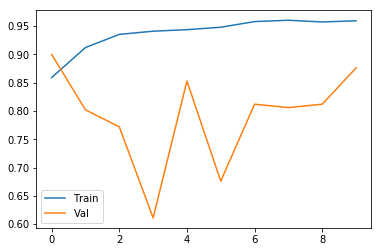

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Train', 'Val'])

# plt.show()

plt.savefig('no_pretrain_mobilenet.png')

In [0]:
while True:
  pass

KeyboardInterrupt: ignored

In [0]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

3910
l
l


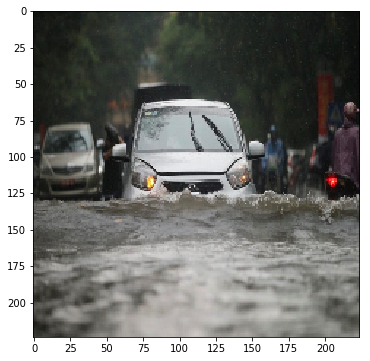

In [0]:
class_idx = 3
indices = np.where(y[:, class_idx] == 1.)[0]
idx = random.choice(indices)

# idx = np.random.randint(0, size)

print(idx)
print(class_list[np.argmax(y[idx])])

x_vis = (x[idx] * 128 + 128).astype('int64')[:, :, ::-1]

plt.imshow(x_vis)

classes = model.predict(np.expand_dims(x[idx], axis = 0))
print(class_list[np.argmax(classes[0])])

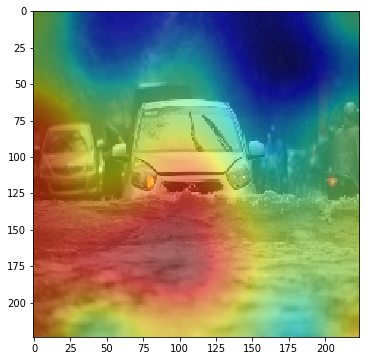

In [0]:
from vis.visualization import visualize_cam, overlay
import matplotlib.cm as cm

grads = visualize_cam(model, layer_idx, filter_indices = class_idx,
                           seed_input = x_vis, backprop_modifier = 'guided')

jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

plt.imshow(overlay(jet_heatmap, x_vis))

In [0]:
from vis.visualization import visualize_activation

filter_idx = 2

img = visualize_activation(model, layer_idx, filter_indices = filter_idx,
                           input_range = (-1., 1.), verbose = True,
                           act_max_weight = 10, lp_norm_weight = 100, tv_weight = 1)

# img_vis = ((img * 128 + 128) / 256)[:, :, ::-1]
img_vis = (img * 128 + 128).astype('int64')[:, :, ::-1]

plt.imshow(img_vis)